In [1]:
# IPython Imports
# Used to make notebook wider, comment out for normal notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
from IPython.display import clear_output

In [2]:
%matplotlib inline
# Import Libraries
import boto3
import csv
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import mplcyberpunk
import seaborn as sns
import scipy as sp
import scipy.stats as stats
from typing import List, Dict, Callable

# plt.style.use('ggplot')
plt.style.use("cyberpunk")

In [3]:
# GLOBAL VARS
BKT_NAME = 'ds-data-2020'
# DATASET NAMES
the_cc = "auto_data_clean.csv" # Main CLEANED Dataset
# SET DATA PATH/KEYS
KEY = the_cc

In [4]:
# Create boto3 s3 Client Object
s3 = boto3.client('s3')
# Create s3 Bucket Object -> Dict
obj = s3.get_object(Bucket=BKT_NAME, Key=KEY)

In [5]:
# Convert Bucket File to pd.DataFrame
auto_df = pd.read_csv(obj['Body'], low_memory=False)

# MPG (AVG) Per Brand

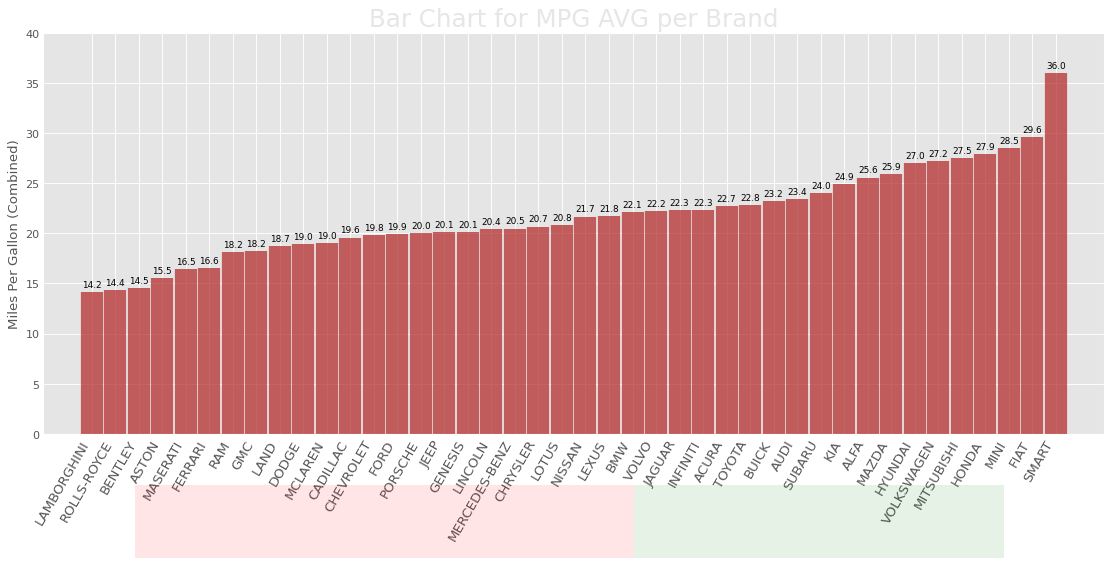

In [25]:
plt.style.use('ggplot')
# Prepare Data
brand_group = auto_df[['Gas Mileage (Combined)', 'Brand']].groupby('Brand').apply(lambda x: x.mean())
brand_group.sort_values('Gas Mileage (Combined)', inplace=True)
brand_group.reset_index(inplace=True)

# Draw plot
fig, ax = plt.subplots(figsize=(14,7), dpi= 80)
ax.vlines(x=brand_group.index, ymin=0, ymax=brand_group["Gas Mileage (Combined)"], color='firebrick', alpha=0.7, linewidth=20)

# Annotate Text
for i, mpg in enumerate(brand_group["Gas Mileage (Combined)"]):
    ax.text(i, mpg+0.5, round(mpg, 1), horizontalalignment='center', fontsize=8, color="black")


# Title, Label, Ticks and Ylim
ax.set_title('Bar Chart for MPG AVG per Brand', fontdict={'size':22})
ax.set(ylabel='Miles Per Gallon (Combined)', ylim=(0, 40))
# ax.set(xlabel='Manufacturer')
plt.xticks(brand_group.index, brand_group["Brand"].str.upper(), rotation=60, horizontalalignment='right', fontsize=12)

# Add patches to color the X axis labels
p1 = patches.Rectangle((.57, -0.005), width=.33, height=.13, alpha=.1, facecolor='green', transform=fig.transFigure)
p2 = patches.Rectangle((.124, -0.005), width=.446, height=.13, alpha=.1, facecolor='red', transform=fig.transFigure)
fig.add_artist(p1)
fig.add_artist(p2)

fig.tight_layout()
plt.show()


# Cylinder Frequency by Horsepower 

In [7]:
# plt.style.use('dark_background')
# # Prepare data
# x_var = 'Horsepower'
# groupby_var = 'Cylinders'
# df_agg = auto_df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
# vals = [df[x_var].values.tolist() for i, df in df_agg]

# # Draw
# plt.figure(figsize=(14,7), dpi= 80)
# colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
# n, bins, patches = plt.hist(vals, 100, stacked=True, density=False, color=colors[:len(vals)])

# # Decoration
# plt.legend({group:col for group, col in zip(np.unique(auto_df[groupby_var]).tolist(), colors[:len(vals)])})
# plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
# plt.xlabel(x_var)
# plt.ylabel("Frequency")
# plt.ylim(0, 1500)
# plt.xticks(ticks=np.arange(60, 860, 100), labels=np.arange(60, 860, 100))

# Show Plot
# fig.tight_layout()
# plt.show()

In [8]:
plt.style.use("cyberpunk")


# Cylinder to MPG Density Plot

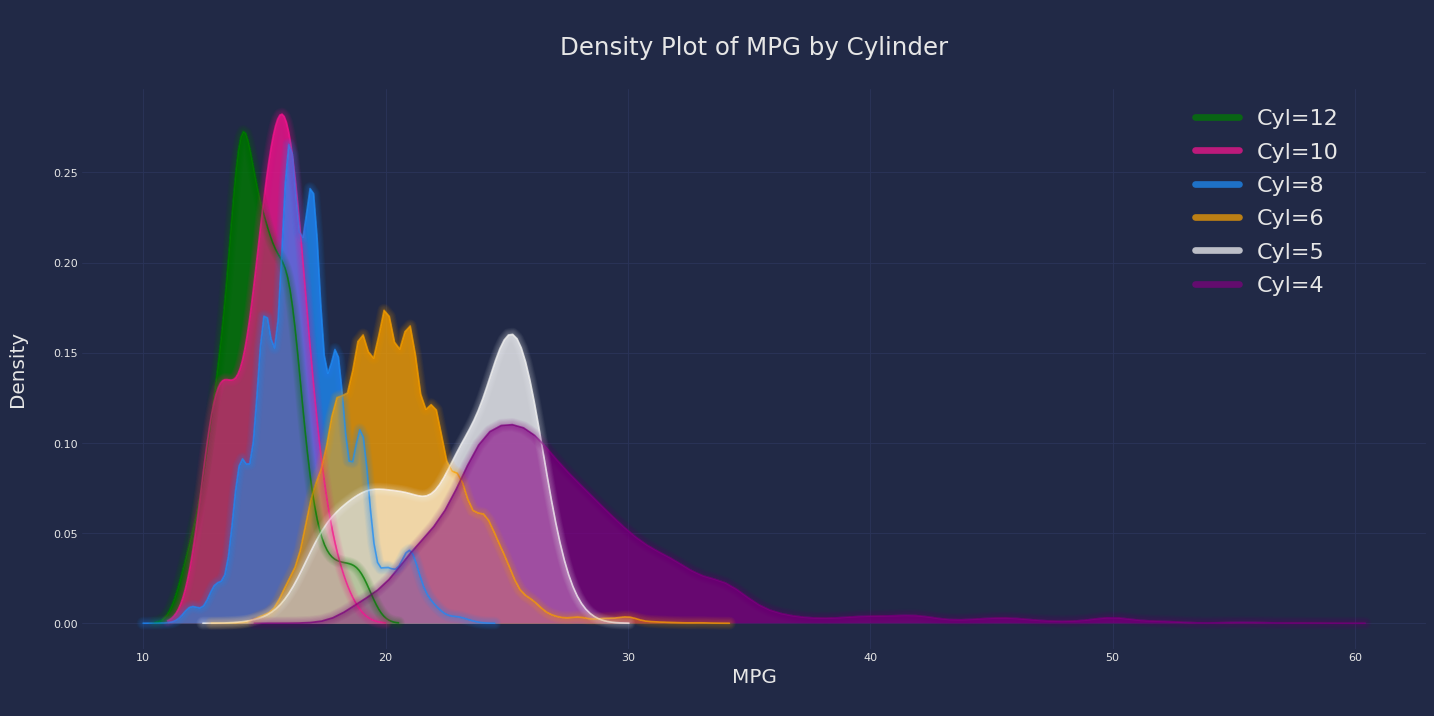

In [14]:
# plt.style.use('dark_background')
# plt.style.use('ggplot')

# Draw Plot
plt.figure(figsize=(14,7), dpi= 80)

alpha_col = 0.7
colors = ["g", "deeppink", "dodgerblue", "orange", "white", "purple", "red"]
cyls = (sorted(auto_df["Cylinders"].unique())[1:-1][::-1])

# Plot Points
for col, cyl in zip(colors, cyls):
    cyl = int(cyl)
    sns.kdeplot(auto_df.loc[auto_df['Cylinders'] == cyl, "Gas Mileage (Combined)"], shade=True, color=col, label=f"Cyl={cyl}", alpha=.7)
#     sns.set_style("whitegrid")

# Decoration
plt.title('\nDensity Plot of MPG by Cylinder\n', fontsize=22)
plt.xlabel("MPG\n", fontsize=18)
plt.ylabel("Density\n", fontsize=18)
legend_ = plt.legend(loc="upper right", bbox_to_anchor=(0.45, 0.5, 0.5, 0.5), fontsize=20, labelspacing=0.6)
mplcyberpunk.add_glow_effects()
mplcyberpunk.add_underglow()

# Increase Label Line Thickness
for line in legend_.get_lines():
    line.set_linewidth(6)

# Show Plot
# fig.tight_layout()
plt.subplots_adjust(left=0, bottom=0, right=1.2, top=1, wspace=1, hspace=0)
plt.show()

# Base Curb Weight to MPG

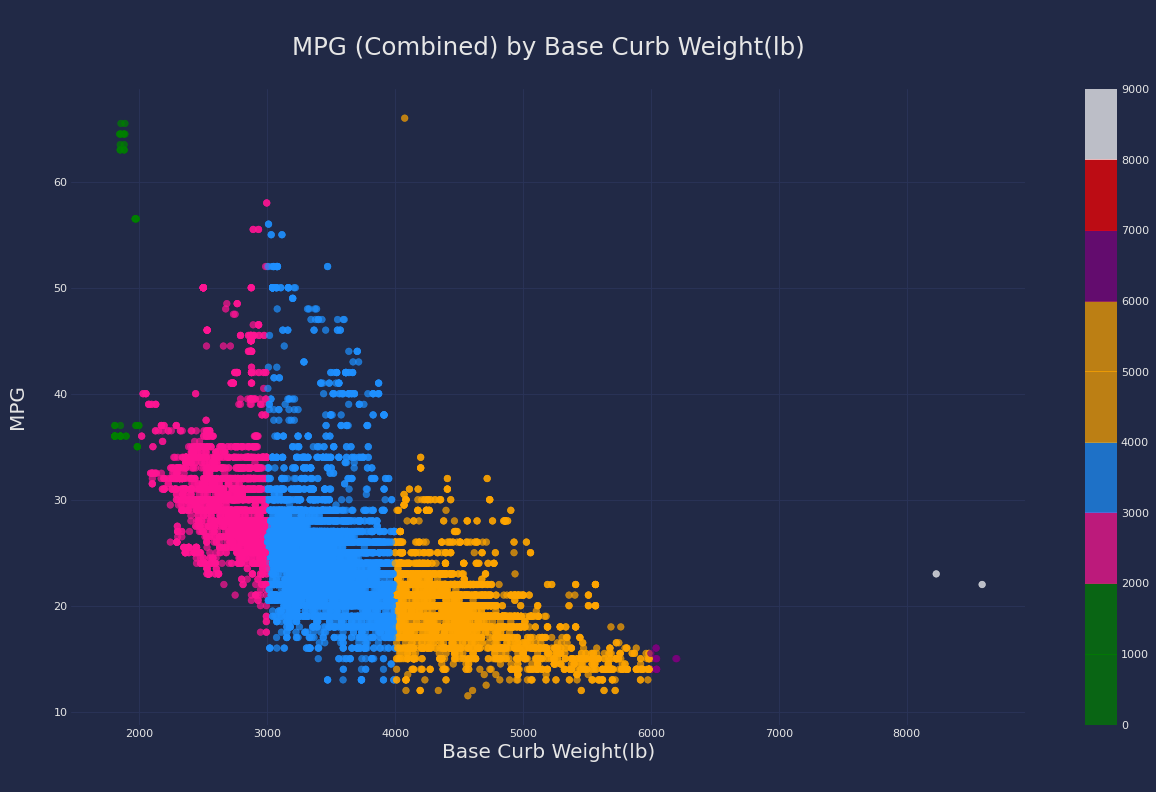

In [17]:
# plt.style.use('dark_background')
# plt.style.use('ggplot')


# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)


alpha_col = 0.7
bounds = np.arange(0, 10000, 1000)
colors = ["g", "deeppink", "dodgerblue", "orange", "purple", "red", "white"]


x, y = (auto_df["Base Curb Weight (lbs)"], auto_df["Gas Mileage (Combined)"])

# Create Color Divides by Weight Range
cmap = matplotlib.colors.ListedColormap(colors)
norm = matplotlib.colors.BoundaryNorm(bounds, len(colors))

# Plot Scatter
plt.scatter(x, y, c=x, cmap=cmap, norm=norm, alpha=0.7)

# Decoration
plt.title('\nMPG (Combined) by Base Curb Weight(lb)\n', fontsize=22)
plt.xlabel("Base Curb Weight(lb)\n", fontsize=18)
plt.ylabel("MPG\n", fontsize=18)
plt.colorbar(orientation='vertical',)

# Show Plot
plt.tight_layout()
plt.show()

# Horsepower to MPG

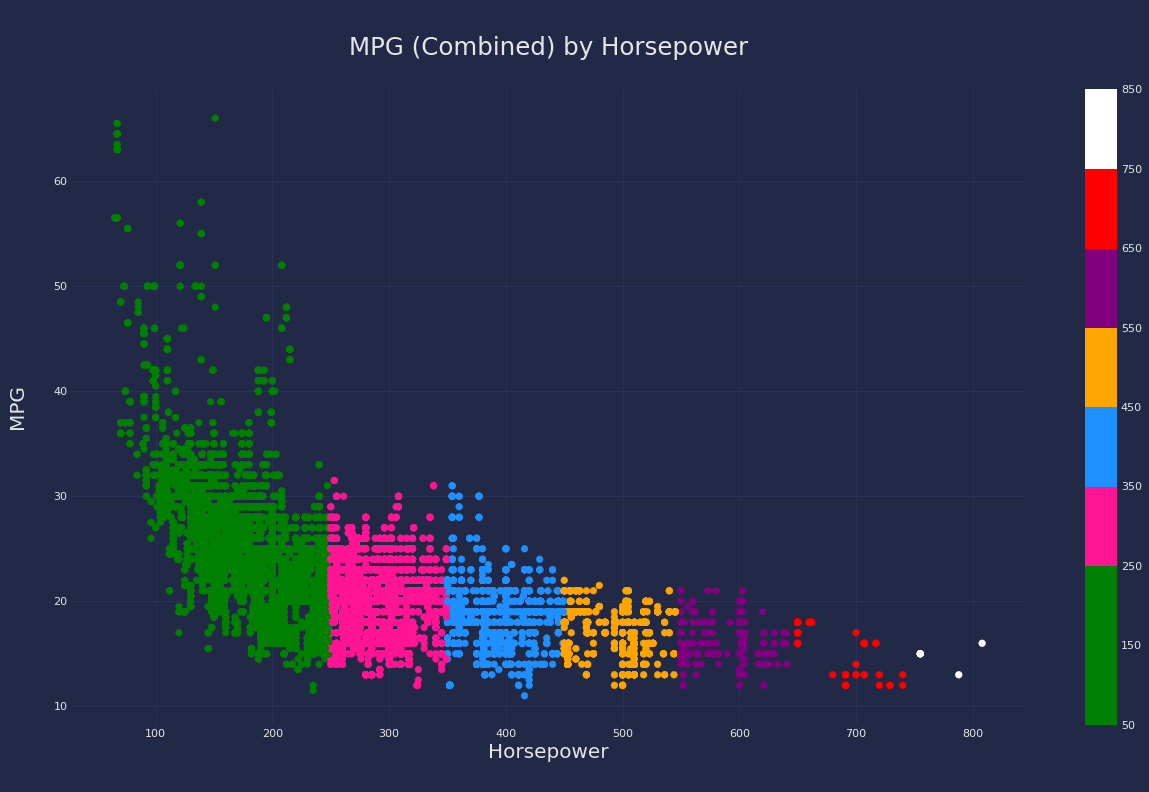

In [11]:
colors = [
    '#08F7FE',  # teal/cyan
    '#FE53BB',  # pink
    '#F5D300',  # yellow
    '#00ff41',  # matrix green
]# plt.style.use('dark_background')
# plt.style.use('ggplot')


# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)


alpha_col = 0.7
bounds = np.arange(50, 950, 100)
colors = ["g", "deeppink", "dodgerblue", "orange", "purple", "red", "white"]


x, y = (auto_df["Horsepower"], auto_df["Gas Mileage (Combined)"])

# Create Color Divides by Weight Range
cmap = matplotlib.colors.ListedColormap(colors)
norm = matplotlib.colors.BoundaryNorm(bounds, len(colors))

# Plot Scatter
plt.scatter(x, y, c=x, cmap=cmap, norm=norm)

# Decoration
plt.title('\nMPG (Combined) by Horsepower\n', fontsize=22)
plt.xlabel("Horsepower\n", fontsize=18)
plt.ylabel("MPG\n", fontsize=18)
plt.colorbar(orientation='vertical',)


# Show Plot
plt.tight_layout()
plt.show()

# Torque to MPG

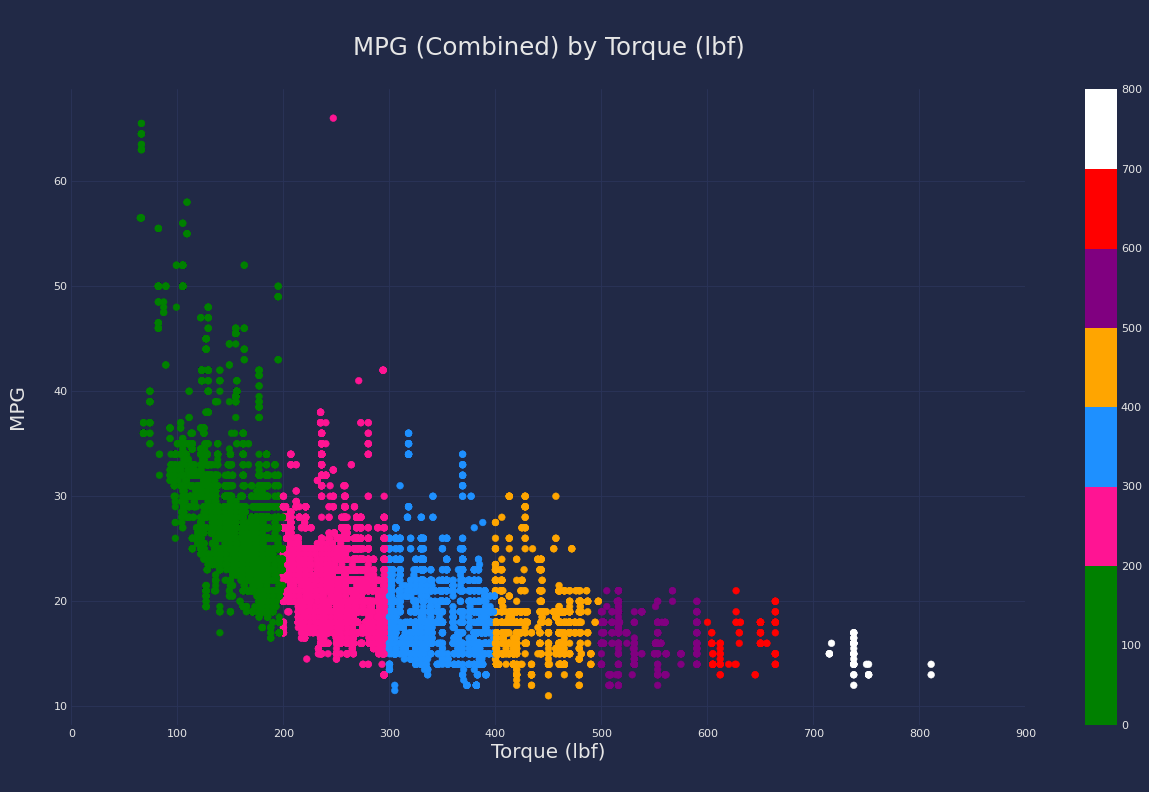

In [12]:
# plt.style.use('dark_background')
# plt.style.use('ggplot')


# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)


alpha_col = 0.7
bounds = np.arange(0, 850, 100)
colors = ["g", "deeppink", "dodgerblue", "orange", "purple", "red", "white"]


x, y = (auto_df["Torque"], auto_df["Gas Mileage (Combined)"])

# Create Color Divides by Weight Range
cmap = matplotlib.colors.ListedColormap(colors)
norm = matplotlib.colors.BoundaryNorm(bounds, len(colors))

# Plot Scatter
plt.scatter(x, y, c=x, cmap=cmap, norm=norm)

# Decoration
plt.title('\nMPG (Combined) by Torque (lbf)\n', fontsize=22)
plt.xlabel("Torque (lbf)\n", fontsize=18)
plt.ylabel("MPG\n", fontsize=18)
plt.colorbar(orientation='vertical',)

# Set Lims
plt.xlim(0, 900)

# Show Plot
plt.tight_layout()
plt.show()

# Passenger Doors Density to MPG

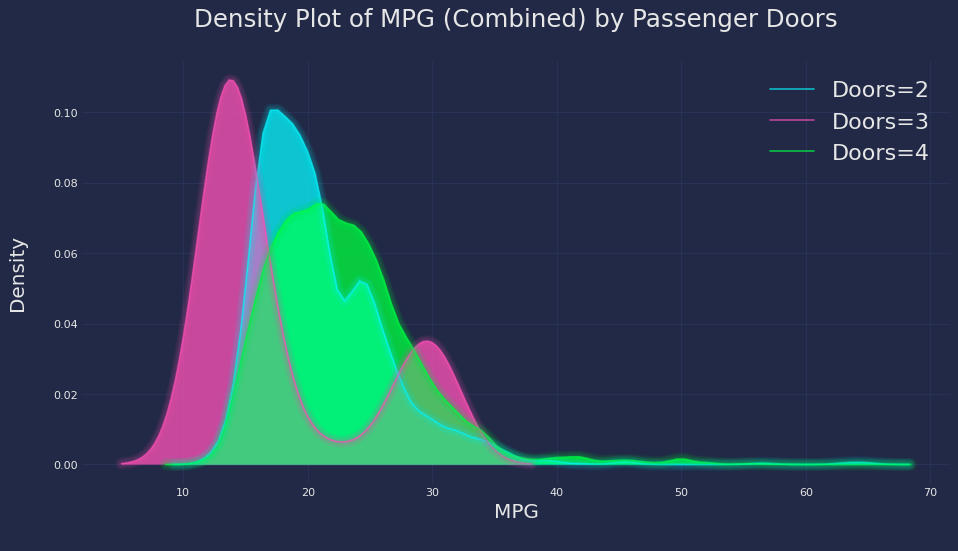

In [22]:
# plt.style.use('dark_background')
# plt.style.use('ggplot')


# Draw Plot
plt.figure(figsize=(14,7), dpi= 80)

alpha_col = 0.7
colors = [
    '#08F7FE',  # teal/cyan
    '#FE53BB',  # pink
    '#00ff41',  # matrix green
    '#F5D300',  # yellow
]
doors = (sorted(auto_df["Passenger Doors"].unique()))

# Plot Points
for col, door in zip(colors, doors):
    door = int(door)
    sns.kdeplot(auto_df.loc[auto_df['Passenger Doors'] == door, "Gas Mileage (Combined)"], shade=True, color=col, label=f"Doors={door}", alpha=.7)

# Decoration
plt.title('Density Plot of MPG (Combined) by Passenger Doors\n', fontsize=22)
plt.xlabel("MPG\n", fontsize=18)
plt.ylabel("Density\n", fontsize=18)
plt.legend(fontsize=20)
mplcyberpunk.add_glow_effects()
mplcyberpunk.add_underglow()


# Show Plot
fig.tight_layout()
plt.show()